In [1]:
!pip3 uninstall -y pDESy 
!pip3 uninstall -y typing # https://github.com/ethereum/eth-abi/issues/131
!pip3 install -U poetry
!pip3 install git+https://git@github.com/mitsuyukiLab/pDESy.git

     |████████████████████████████████| 225kB 2.8MB/s 
     |████████████████████████████████| 92kB 5.3MB/s 
     |████████████████████████████████| 61kB 5.6MB/s 
     |████████████████████████████████| 61kB 5.5MB/s 
     |████████████████████████████████| 112kB 8.9MB/s 
     |████████████████████████████████| 2.7MB 8.6MB/s 
  Created wheel for pyrsistent: filename=pyrsistent-0.14.11-cp36-cp36m-linux_x86_64.whl size=95877 sha256=97fee73b76ca77064d69a5803aa5ae51685863466101710a9957e41dd22665f9
  Stored in directory: /root/.cache/pip/wheels/83/59/9a/a037b9b3c3e93d9275ea0aff9d6064400f372879dfdab01afe
Successfully built pyrsistent
  Found existing installation: importlib-metadata 1.7.0
    Uninstalling importlib-metadata-1.7.0:
      Successfully uninstalled importlib-metadata-1.7.0
  Found existing installation: pyrsistent 0.16.0
    Uninstalling pyrsistent-0.16.0:
      Successfully uninstalled pyrsistent-0.16.0
  Found existing installation: jsonschema 2.6.0
    Uninstalling jsonschema-

In [2]:
import datetime

import pDESy
from pDESy.model.base_project import BaseProject
from pDESy.model.base_product import BaseProduct
from pDESy.model.base_component import BaseComponent
from pDESy.model.base_workflow import BaseWorkflow
from pDESy.model.base_task import BaseTask
from pDESy.model.base_organization import BaseOrganization
from pDESy.model.base_team import BaseTeam
from pDESy.model.base_resource import BaseResource
from pDESy.model.base_facility import BaseFacility
from pDESy.model.base_factory import BaseFactory

print(pDESy.__version__)

0.2.1


In [3]:
project = BaseProject(init_datetime = datetime.datetime(2020, 4, 1,8, 0, 0), unit_timedelta=datetime.timedelta(days=1))

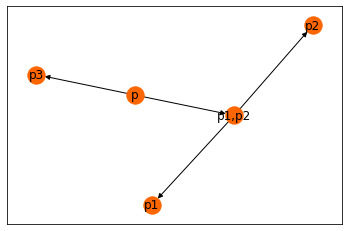

In [4]:
p1 = BaseComponent('p1')
p2 = BaseComponent('p2')
p1p2 = BaseComponent('p1,p2',child_component_list=[p1,p2])
p3 = BaseComponent('p3')
p = BaseComponent('p', child_component_list=[p1p2,p3])
project.product = BaseProduct([p, p1, p2, p1p2, p3])
project.product.draw_networkx()

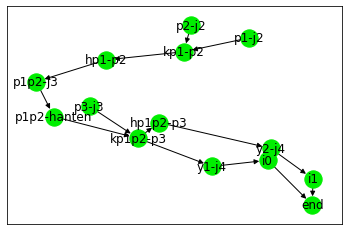

In [5]:
# 矢印のendpointベースでタスクを作成し、前後関係はノードのin/out矢印情報から作成する

# p1とp2を定盤2へ配材
taskh0 = BaseTask('p1-j2')
p1.append_targeted_task(taskh0)
taskh1 = BaseTask('p2-j2')
p2.append_targeted_task(taskh1)
# p1-p2の仮付け溶接
taskkp1p2 = BaseTask('kp1-p2')
p2.append_targeted_task(taskkp1p2)
taskkp1p2.extend_input_task_list([taskh0, taskh1])

# p1-p2の本付け溶接
taskhonp1p2 = BaseTask('hp1-p2')
p2.append_targeted_task(taskhonp1p2)
taskhonp1p2.extend_input_task_list([taskkp1p2])

# p3とp1p2を定盤3へ配材
taskh2 = BaseTask('p3-j3')
p3.append_targeted_task(taskh2)
taskh3 = BaseTask('p1p2-j3')
p2.append_targeted_task(taskh3)
taskh3.extend_input_task_list([taskhonp1p2])

# p1p2の反転
taskhantenn0 = BaseTask('p1p2-hanten')
p2.append_targeted_task(taskhantenn0)
taskhantenn0.extend_input_task_list([taskh3])

# p1p2とp3の仮付け溶接
taskkp1p2p3 = BaseTask('kp1p2-p3')
p3.append_targeted_task(taskkp1p2p3)
taskkp1p2p3.extend_input_task_list([taskhantenn0, taskh2])

# 溶接機1を定盤4へ配材
taskh4 = BaseTask('y1-j4')
taskh4.extend_input_task_list([taskkp1p2p3])

# worker1の移動
taski0 = BaseTask('i0')
taski0.extend_input_task_list([taskh4])

# p1p2-p3の本溶接
taskhonp1p2p3 = BaseTask('hp1p2-p3')
p3.append_targeted_task(taskhonp1p2p3)
taskhonp1p2p3.extend_input_task_list([taskkp1p2p3])

# 溶接機2を定盤4へ移動
taskh5 = BaseTask('y2-j4')
taskh5.extend_input_task_list([taskhonp1p2p3])

#worker2の移動
taski1 = BaseTask('i1')
taski1.extend_input_task_list([taskh5])

# end
taskend = BaseTask('end')
taskend.extend_input_task_list([taski0, taski1])




project.workflow = BaseWorkflow([taskh0, taskh1, taskkp1p2, taskhonp1p2, taskh2, taskh3, taskhantenn0, taskkp1p2p3,taskh4, taski0, taskhonp1p2p3, taskh5, taski1, taskend])
project.workflow.draw_networkx()

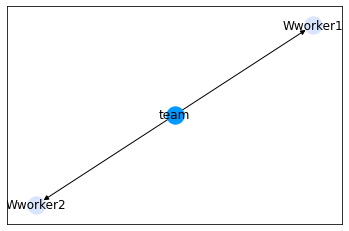

In [6]:
team = BaseTeam('team')
wworker1 = BaseResource('Wworker1', team_id=team.ID, cost_per_time=10.0)
wworker1.workamount_skill_mean_map = {taskh0.name:1.0, taskh1.name:1.0, taskkp1p2.name:1.0,taskh2.name:1.0, taskh3.name:1.0, taskhantenn0.name:1.0, taskkp1p2p3.name:1.0, taskh4.name:1.0, taski0.name:1.0, taskend.name:1.0 }
team.worker_list.append(wworker1)

wworker2 = BaseResource('Wworker2', team_id=team.ID, cost_per_time=10.0)
wworker2.workamount_skill_mean_map = {taskhonp1p2.name:1.0, taskhonp1p2p3.name:1.0, taskh5.name:1.0, taski1.name:1.0, taskend.name:1.0}
team.worker_list.append(wworker2)
team.extend_targeted_task_list(project.workflow.task_list)

project.organization = BaseOrganization(team_list=[team])
project.organization.draw_networkx(view_workers=True)

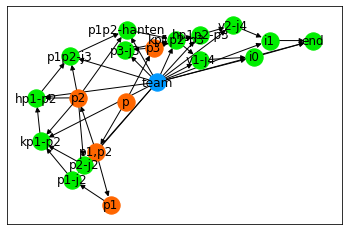

In [7]:
project.draw_networkx()

In [10]:
project.simulate(max_time = 1000, worker_perfoming_mode = 'single-task', task_performed_mode = 'multi-workers')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2b8ee21898>)

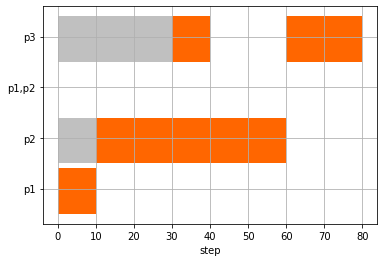

In [11]:
project.product.create_simple_gantt(view_ready=True)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2b8ebfd940>)

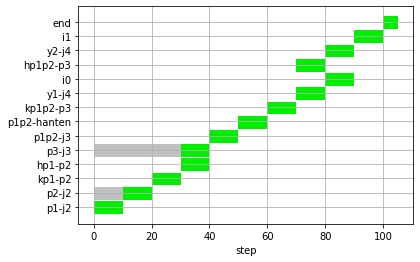

In [12]:
project.workflow.create_simple_gantt(view_auto_task=True, view_ready=True)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2b8ee07780>)

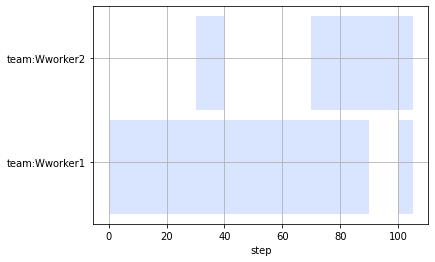

In [13]:
project.organization.create_simple_gantt()